In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [7]:
df = pd.read_excel(r"C:\Users\adity\customer_segmentation_project\data\raw\marketing_campaign.xlsx")
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,2012-09-04,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,2014-03-08,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,2014-02-10,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,5,0,0,0,0,0,0,3,11,0
2236,4001,1946,PhD,Together,64014.0,2,1,2014-06-10,56,406,...,7,0,0,0,1,0,0,3,11,0
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,6,0,1,0,0,0,0,3,11,0
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,3,0,0,0,0,0,0,3,11,0


In [9]:
df.shape

(2240, 29)

In [13]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ID                   2240 non-null   int64         
 1   Year_Birth           2240 non-null   int64         
 2   Education            2240 non-null   object        
 3   Marital_Status       2240 non-null   object        
 4   Income               2216 non-null   float64       
 5   Kidhome              2240 non-null   int64         
 6   Teenhome             2240 non-null   int64         
 7   Dt_Customer          2240 non-null   datetime64[ns]
 8   Recency              2240 non-null   int64         
 9   MntWines             2240 non-null   int64         
 10  MntFruits            2240 non-null   int64         
 11  MntMeatProducts      2240 non-null   int64         
 12  MntFishProducts      2240 non-null   int64         
 13  MntSweetProducts     2240 non-nul

In [17]:
df["Age"]=2025-df['Year_Birth']
df["Age"]

0       68
1       71
2       60
3       41
4       44
        ..
2235    58
2236    79
2237    44
2238    69
2239    71
Name: Age, Length: 2240, dtype: int64

In [19]:
df=df.drop(['Year_Birth'], axis=1)
df

,ID,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age
0,5524,Graduation,Single,58138.0,0,0,2012-09-04,58,635,88,...,0,0,0,0,0,0,3,11,1,68
1,2174,Graduation,Single,46344.0,1,1,2014-03-08,38,11,1,...,0,0,0,0,0,0,3,11,0,71
2,4141,Graduation,Together,71613.0,0,0,2013-08-21,26,426,49,...,0,0,0,0,0,0,3,11,0,60
3,6182,Graduation,Together,26646.0,1,0,2014-02-10,26,11,4,...,0,0,0,0,0,0,3,11,0,41
4,5324,PhD,Married,58293.0,1,0,2014-01-19,94,173,43,...,0,0,0,0,0,0,3,11,0,44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,0,1,2013-06-13,46,709,43,...,0,0,0,0,0,0,3,11,0,58
2236,4001,PhD,Together,64014.0,2,1,2014-06-10,56,406,0,...,0,0,0,1,0,0,3,11,0,79
2237,7270,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,48,...,0,1,0,0,0,0,3,11,0,44
2238,8235,Master,Together,69245.0,0,1,2014-01-24,8,428,30,...,0,0,0,0,0,0,3,11,0,69


In [21]:
df["children"] = df['Kidhome'] + df['Teenhome']
df["children"]

0       0
1       2
2       0
3       1
4       1
       ..
2235    1
2236    3
2237    0
2238    1
2239    2
Name: children, Length: 2240, dtype: int64

In [23]:
df=df.drop(['Kidhome','Teenhome'], axis=1)
df

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response,Age,children
0,5524,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,...,0,0,0,0,0,3,11,1,68,0
1,2174,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,...,0,0,0,0,0,3,11,0,71,2
2,4141,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,...,0,0,0,0,0,3,11,0,60,0
3,6182,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,...,0,0,0,0,0,3,11,0,41,1
4,5324,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,...,0,0,0,0,0,3,11,0,44,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,2013-06-13,46,709,43,182,42,...,0,0,0,0,0,3,11,0,58,1
2236,4001,PhD,Together,64014.0,2014-06-10,56,406,0,30,0,...,0,0,1,0,0,3,11,0,79,3
2237,7270,Graduation,Divorced,56981.0,2014-01-25,91,908,48,217,32,...,1,0,0,0,0,3,11,0,44,0
2238,8235,Master,Together,69245.0,2014-01-24,8,428,30,214,80,...,0,0,0,0,0,3,11,0,69,1


In [25]:
df['Marital_Status'].value_counts()

Marital_Status
Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: count, dtype: int64

In [27]:
acceptedcmpns = ['AcceptedCmp1','AcceptedCmp2','AcceptedCmp3','AcceptedCmp4','AcceptedCmp5','Response']

for cmp in acceptedcmpns:
    print(f"Value counts for {cmp}:")
    print(df[cmp].value_counts())
    print("-" * 40)

Value counts for AcceptedCmp1:
AcceptedCmp1
0    2096
1     144
Name: count, dtype: int64
----------------------------------------
Value counts for AcceptedCmp2:
AcceptedCmp2
0    2210
1      30
Name: count, dtype: int64
----------------------------------------
Value counts for AcceptedCmp3:
AcceptedCmp3
0    2077
1     163
Name: count, dtype: int64
----------------------------------------
Value counts for AcceptedCmp4:
AcceptedCmp4
0    2073
1     167
Name: count, dtype: int64
----------------------------------------
Value counts for AcceptedCmp5:
AcceptedCmp5
0    2077
1     163
Name: count, dtype: int64
----------------------------------------
Value counts for Response:
Response
0    1906
1     334
Name: count, dtype: int64
----------------------------------------


In [29]:
df['TotalAccepted'] = df[acceptedcmpns].sum(axis=1)
print(df['TotalAccepted'].value_counts())

print("0 --> Never accepted any campaign")
print("1-5 ---> Accepted many campaigns")

TotalAccepted
0    1631
1     370
2     142
3      51
4      36
5      10
Name: count, dtype: int64
0 --> Never accepted any campaign
1-5 ---> Accepted many campaigns


In [31]:
df = df.drop(acceptedcmpns, axis=1)
df

,ID,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Z_CostContact,Z_Revenue,Age,children,TotalAccepted
0,5524,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,...,8,10,4,7,0,3,11,68,0,1
1,2174,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,...,1,1,2,5,0,3,11,71,2,0
2,4141,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,...,8,2,10,4,0,3,11,60,0,0
3,6182,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,...,2,0,4,6,0,3,11,41,1,0
4,5324,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,...,5,3,6,5,0,3,11,44,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,Graduation,Married,61223.0,2013-06-13,46,709,43,182,42,...,9,3,4,5,0,3,11,58,1,0
2236,4001,PhD,Together,64014.0,2014-06-10,56,406,0,30,0,...,8,2,5,7,0,3,11,79,3,1
2237,7270,Graduation,Divorced,56981.0,2014-01-25,91,908,48,217,32,...,2,3,13,6,0,3,11,44,0,1
2238,8235,Master,Together,69245.0,2014-01-24,8,428,30,214,80,...,6,5,10,3,0,3,11,69,1,0


In [33]:
# Irrelevant columns
df = df.drop(['Z_CostContact', 'Z_Revenue', 'ID'], axis=1)

In [35]:
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'])

In [37]:
df.isnull().sum()

Education               0
Marital_Status          0
Income                 24
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
Complain                0
Age                     0
children                0
TotalAccepted           0
dtype: int64

In [39]:
df = df.dropna(subset=['Income'])
df

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,children,TotalAccepted
0,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,88,3,8,10,4,7,0,68,0,1
1,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,6,2,1,1,2,5,0,71,2,0
2,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,42,1,8,2,10,4,0,60,0,0
3,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,3,5,2,2,0,4,6,0,41,1,0
4,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,15,5,5,3,6,5,0,44,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,2013-06-13,46,709,43,182,42,118,247,2,9,3,4,5,0,58,1,0
2236,PhD,Together,64014.0,2014-06-10,56,406,0,30,0,0,8,7,8,2,5,7,0,79,3,1
2237,Graduation,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,24,1,2,3,13,6,0,44,0,1
2238,Master,Together,69245.0,2014-01-24,8,428,30,214,80,30,61,2,6,5,10,3,0,69,1,0


In [41]:
df.isnull().sum()

Education              0
Marital_Status         0
Income                 0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
Complain               0
Age                    0
children               0
TotalAccepted          0
dtype: int64

In [43]:
df['TotalSpend'] = df[['MntWines','MntFruits','MntMeatProducts','MntFishProducts','MntSweetProducts','MntGoldProds']].sum(axis=1)

In [45]:
df['TotalPurchases'] = df[['NumDealsPurchases','NumWebPurchases','NumCatalogPurchases','NumStorePurchases']].sum(axis=1)

In [47]:
df["Dt_Customer"] = pd.to_datetime(df.Dt_Customer)

In [49]:
df['Complain'].value_counts()

Complain
0    2195
1      21
Name: count, dtype: int64

In [51]:
complained_customers = df[df['Complain'] == 1]

In [53]:
complained_customers[['Income', 'Age', 'TotalSpend', 'Marital_Status', 'Education']]

,Income,Age,TotalSpend,Marital_Status,Education
78,26326.0,49,18,Together,2n Cycle
147,38547.0,44,22,Together,Graduation
192,36640.0,125,65,Divorced,2n Cycle
271,31788.0,42,60,Single,Master
355,38643.0,47,49,Single,Graduation
358,65073.0,82,900,Married,Master
590,39684.0,41,81,Single,PhD
972,15716.0,37,92,Married,2n Cycle
1041,38998.0,71,54,Married,Graduation
1069,67023.0,47,906,Married,Graduation


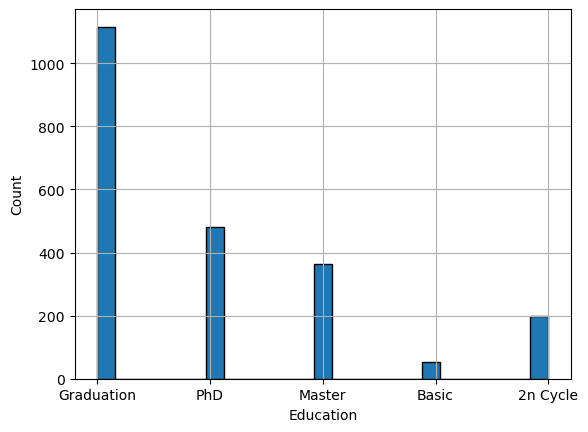

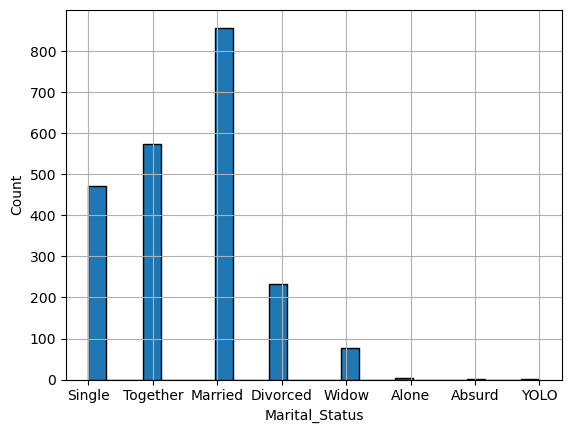

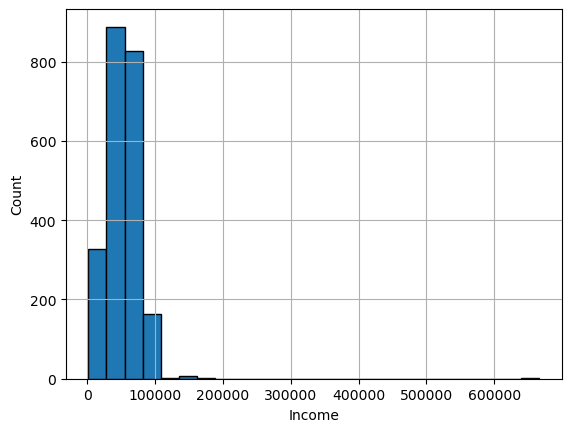

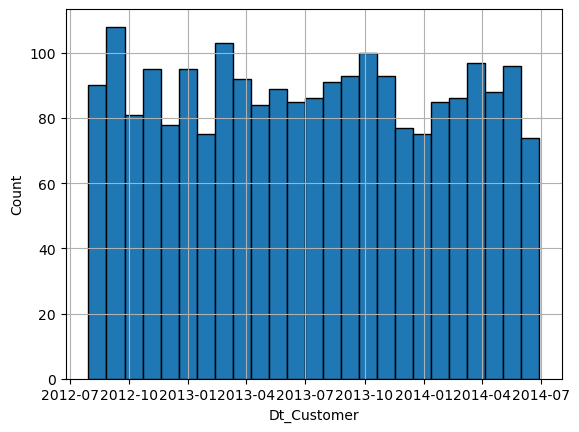

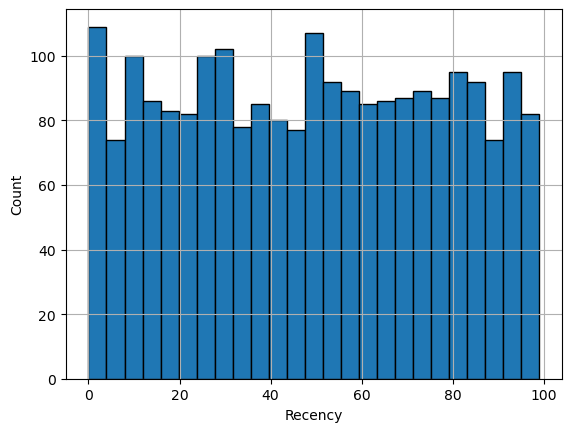

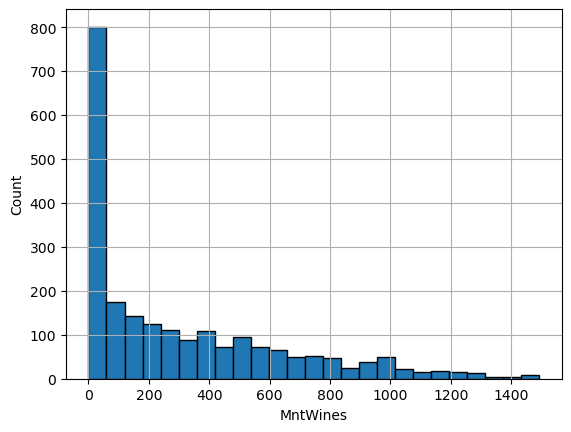

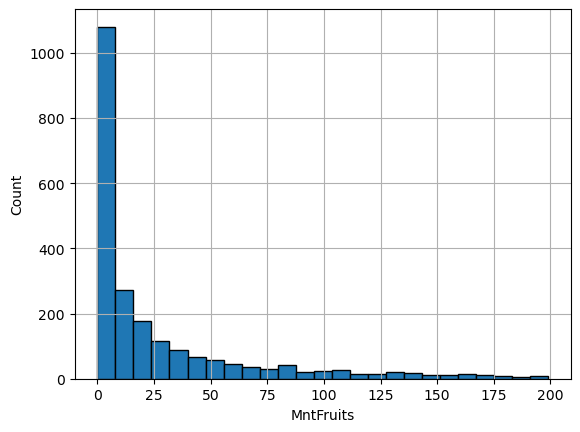

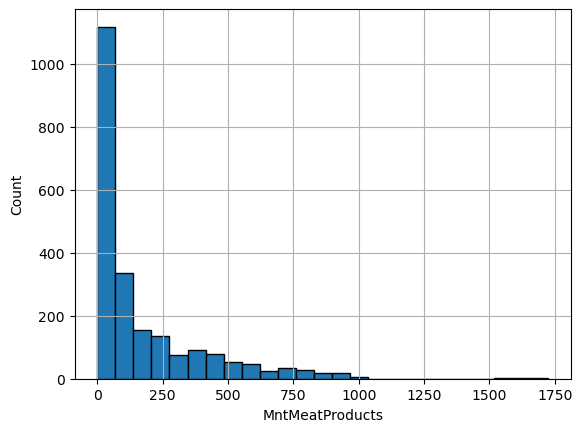

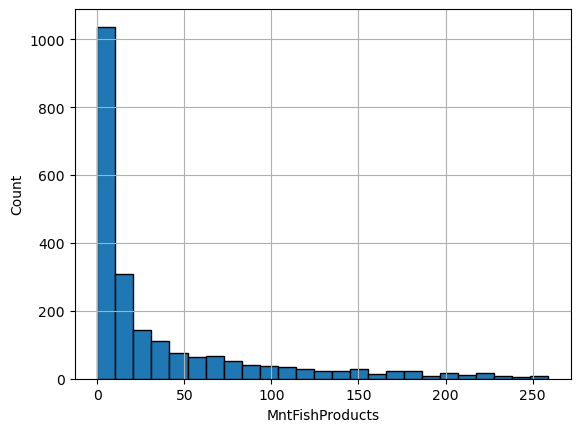

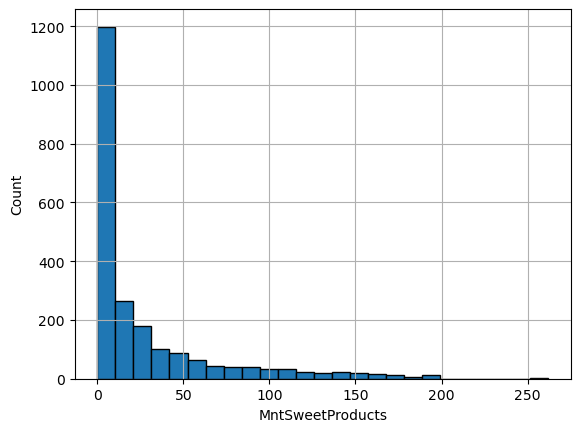

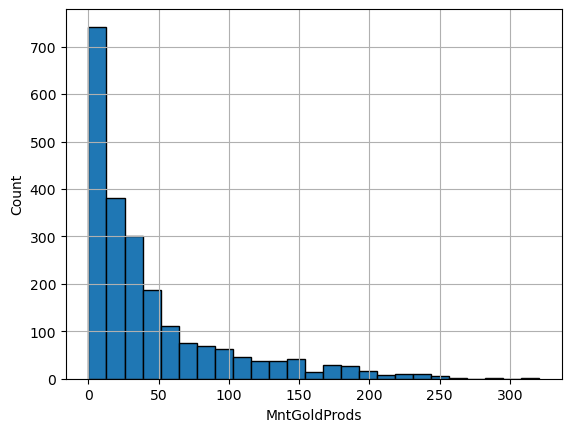

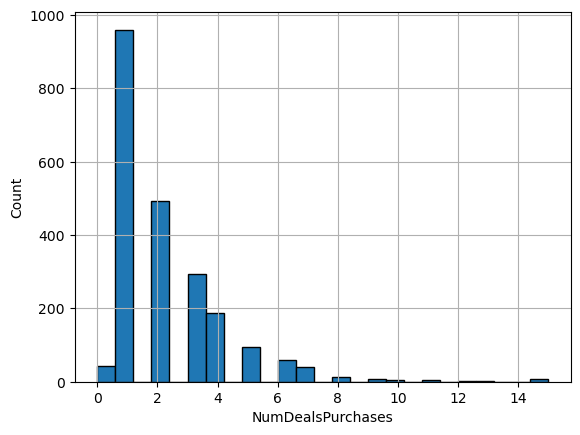

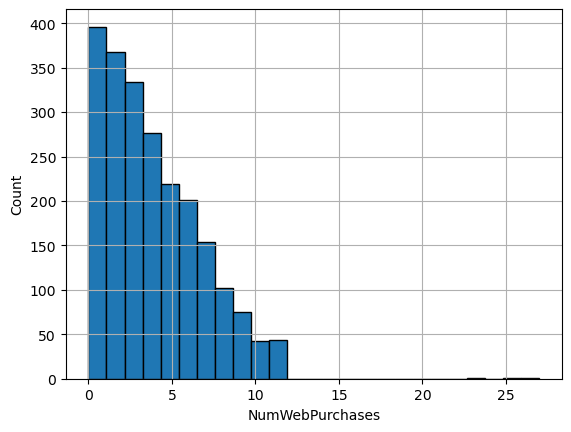

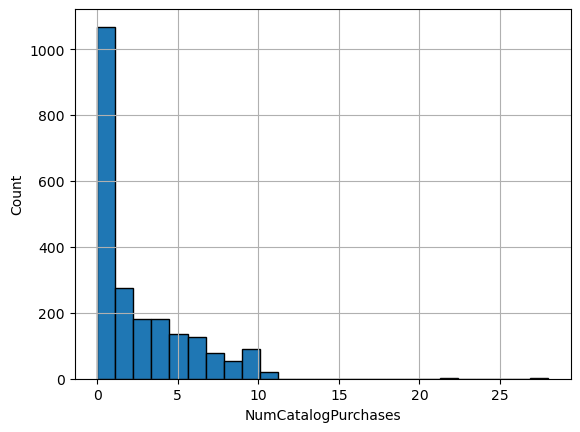

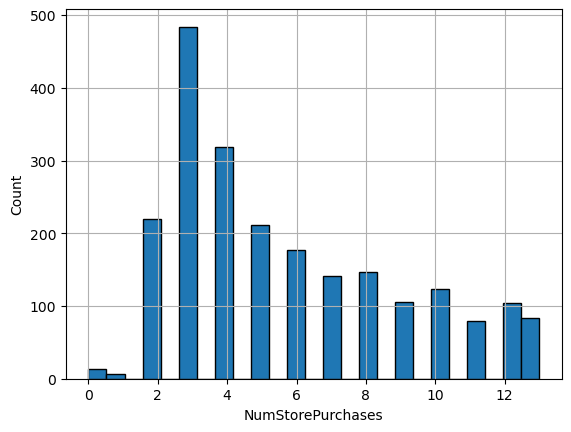

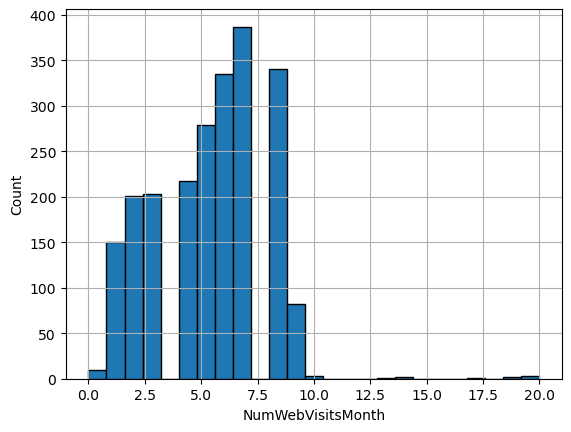

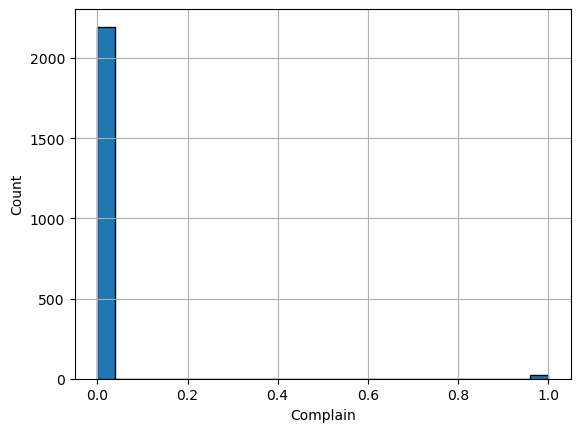

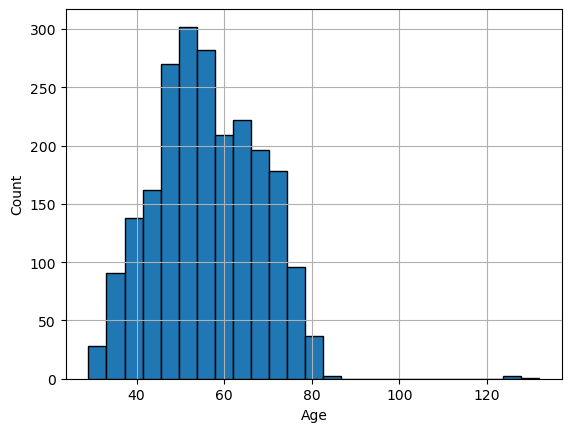

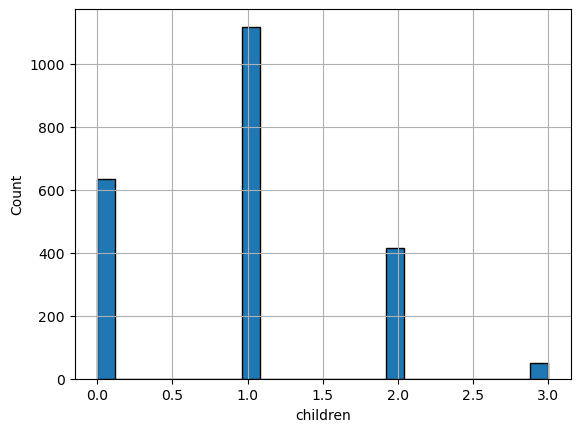

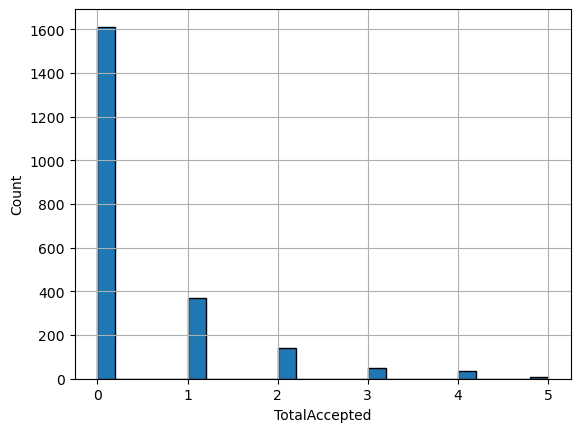

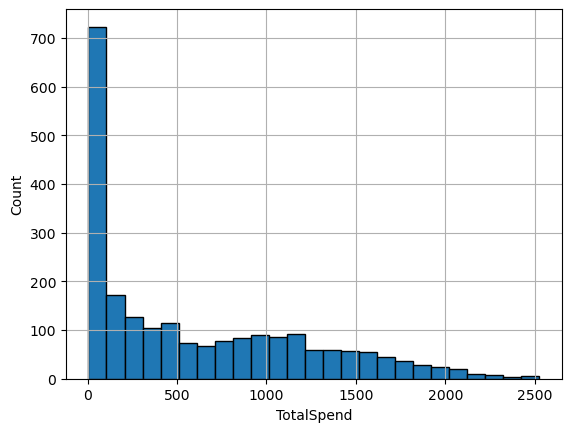

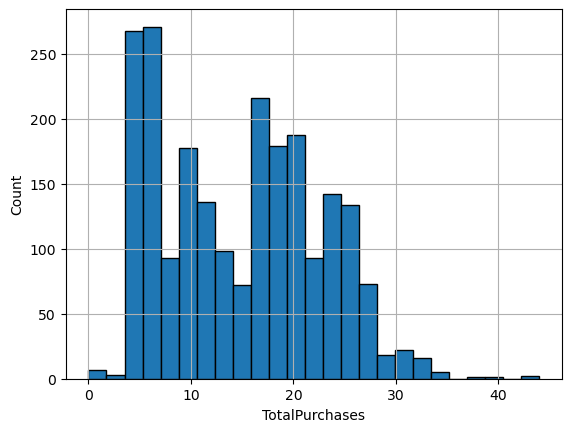

In [55]:
for feature in df.columns:
    df=df.copy()
    df[feature].hist(bins=25, edgecolor="Black")
    plt.ylabel("Count")
    plt.xlabel(feature)
    plt.show()

In [57]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

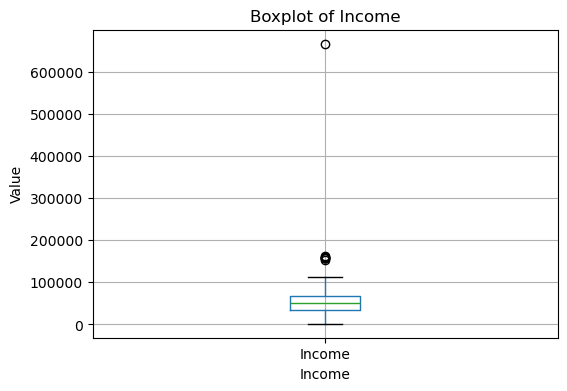

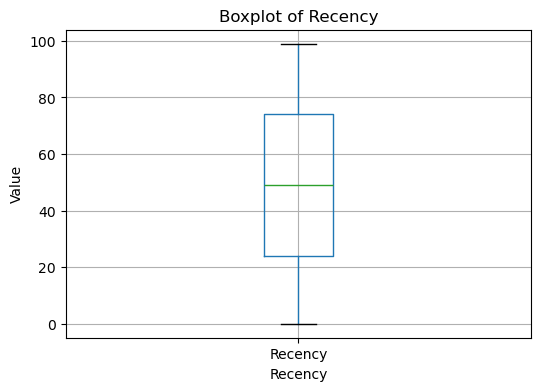

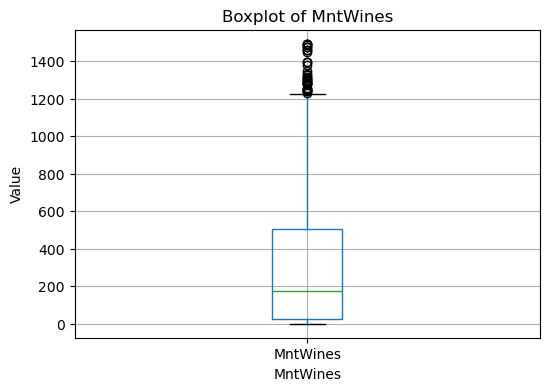

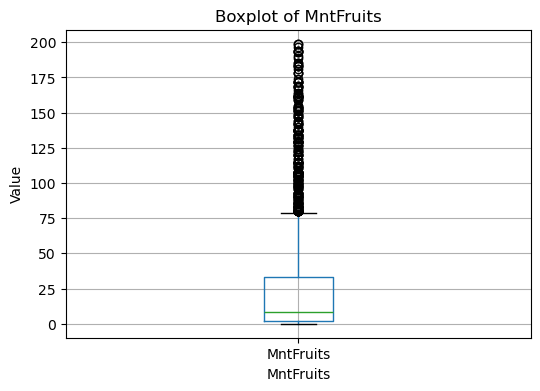

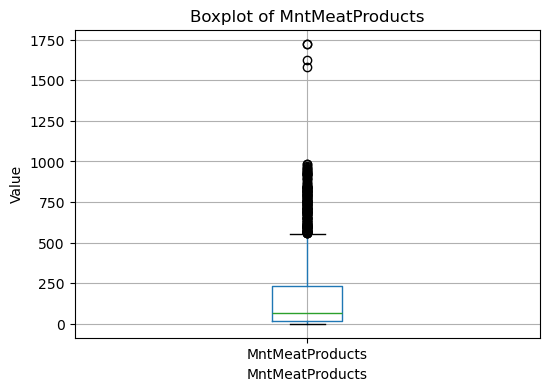

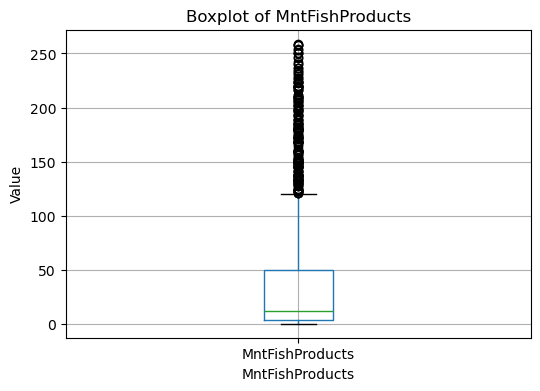

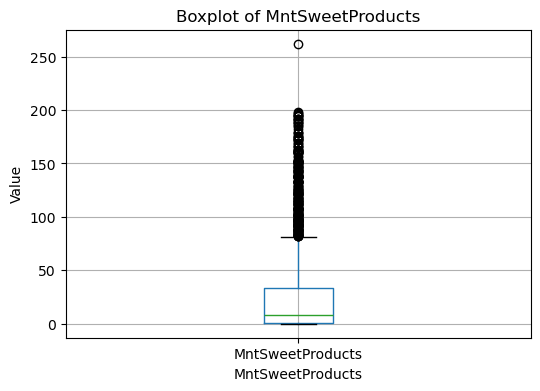

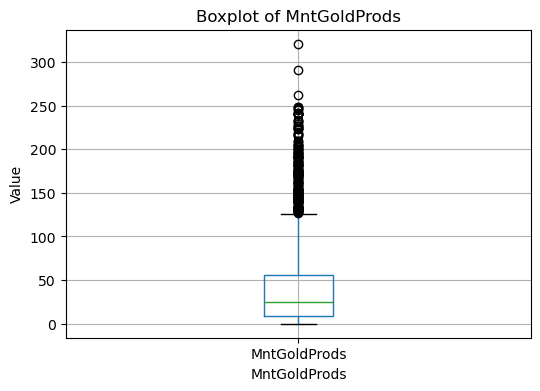

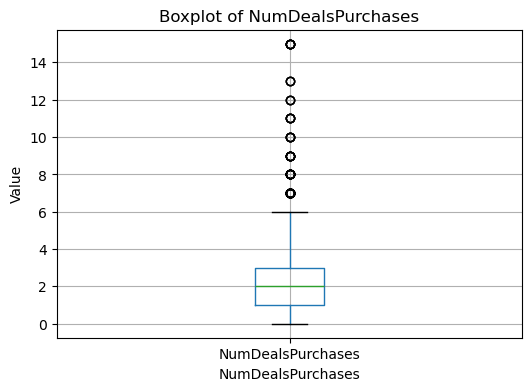

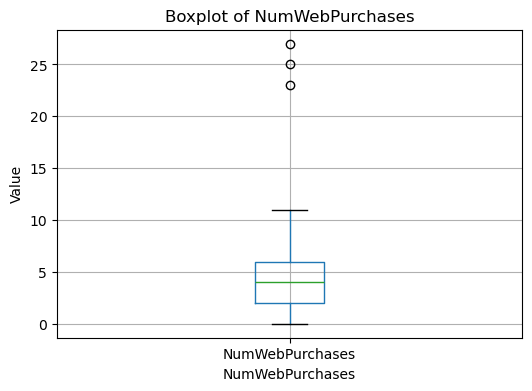

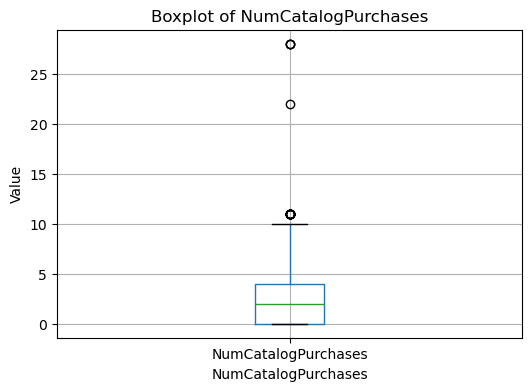

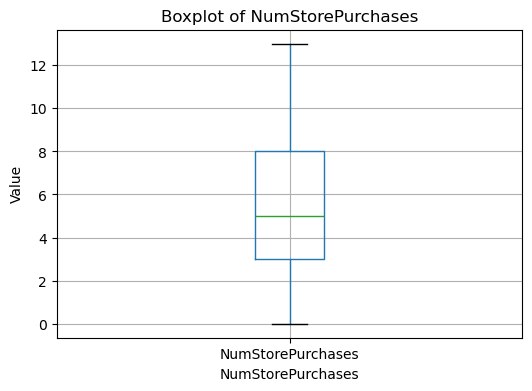

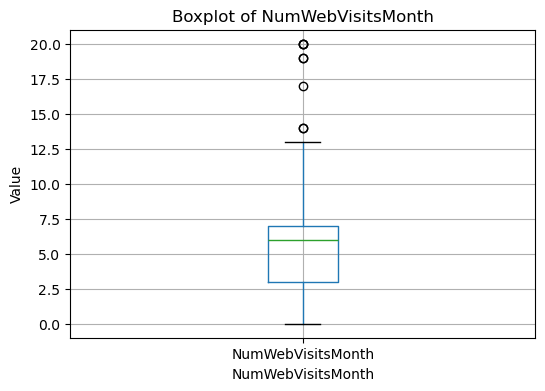

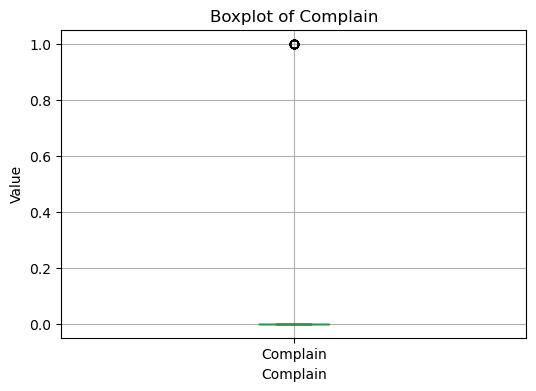

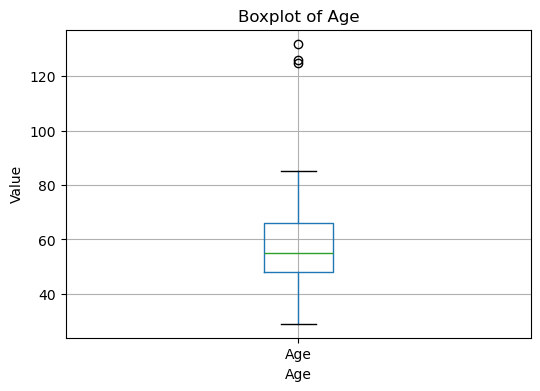

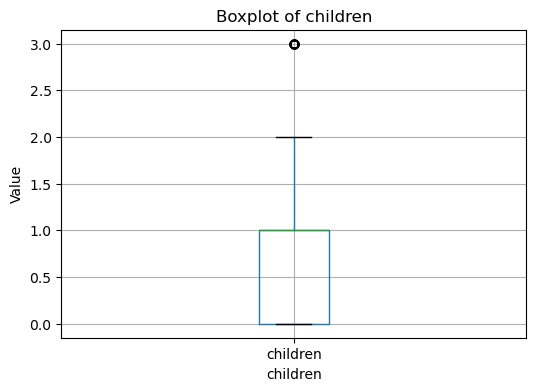

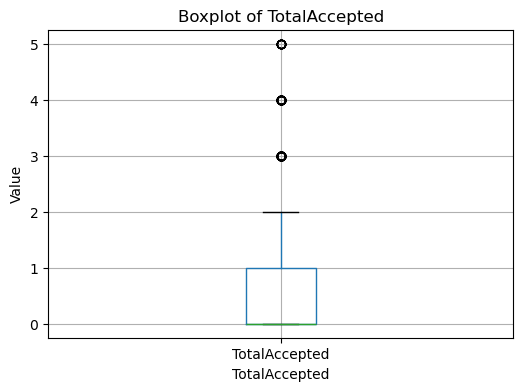

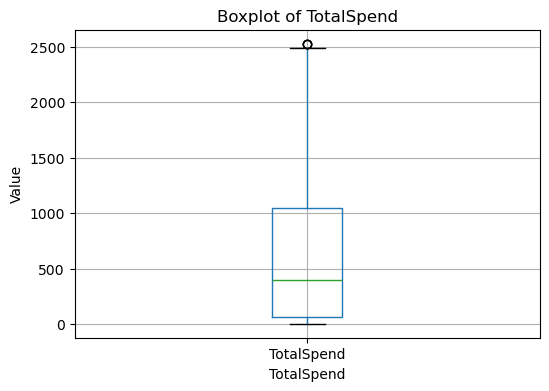

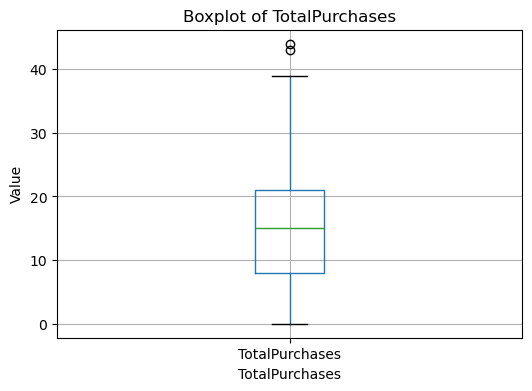

In [59]:
for feature in df.select_dtypes(include=['number']).columns:
    plt.figure(figsize=(6, 4))
    df.boxplot(column=feature)
    plt.ylabel("Value")
    plt.xlabel(feature)
    plt.title(f"Boxplot of {feature}")
    plt.show()

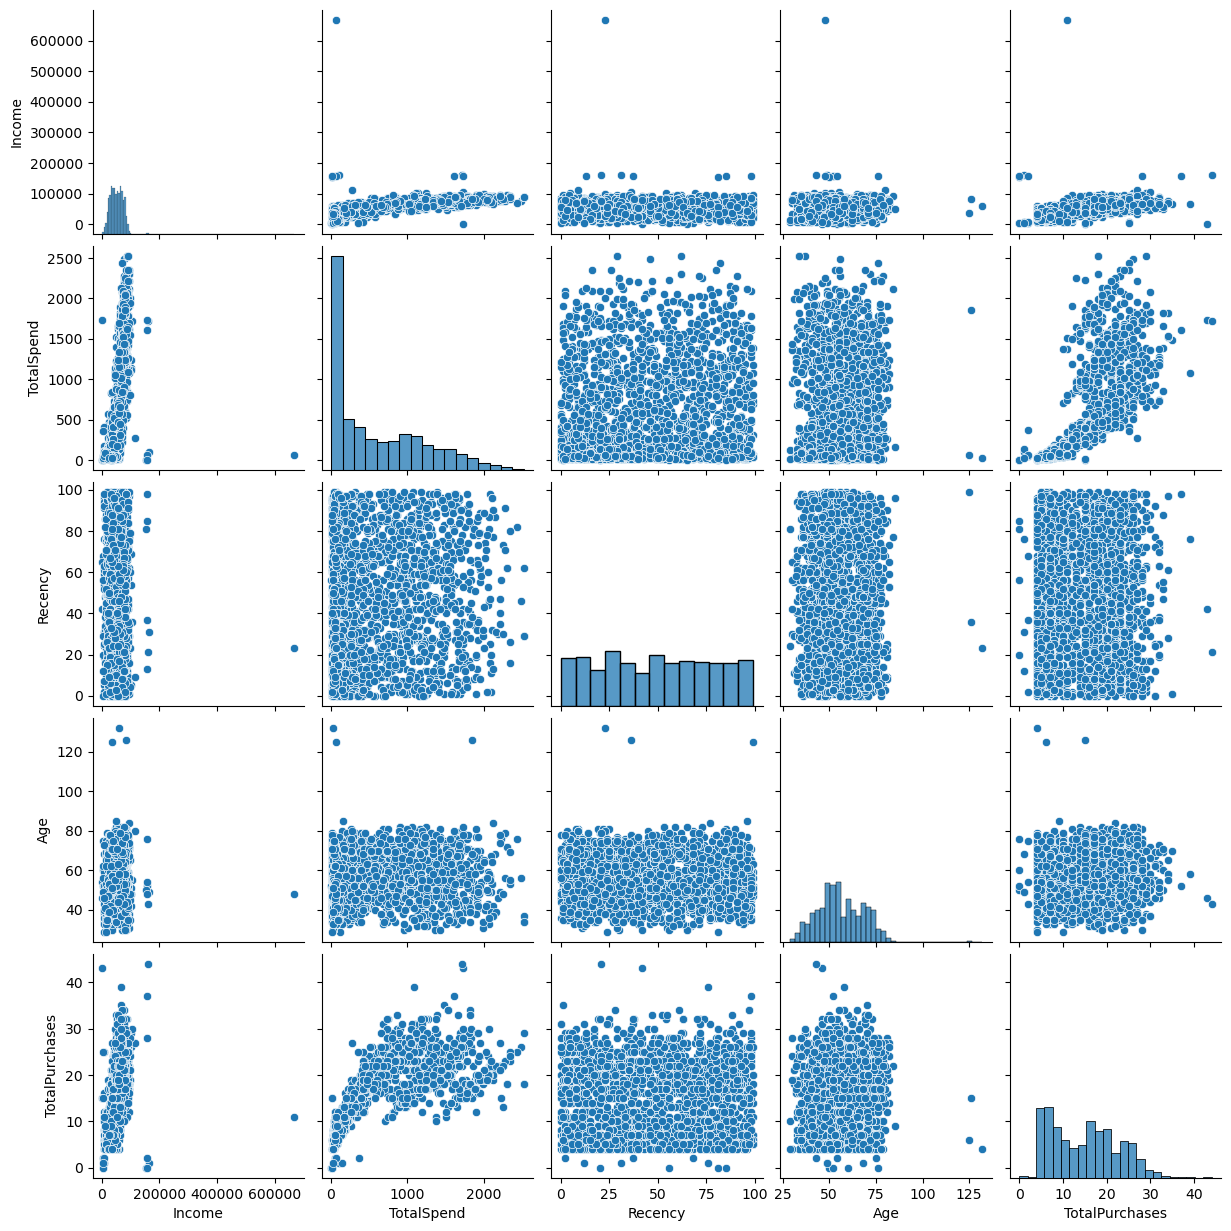

In [61]:
sns.pairplot(df,vars=['Income','TotalSpend','Recency','Age','TotalPurchases' ])
plt.show()

In [62]:
correlation=df.corr(numeric_only=True)
correlation

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,children,TotalAccepted,TotalSpend,TotalPurchases
Income,1.000000,-0.003970,0.578650,0.430842,0.584633,0.438871,0.440744,0.325916,-0.083101,0.387878,0.589162,0.529362,-0.553088,-0.027225,0.161791,-0.293352,0.287984,0.667576,0.566873
Recency,-0.003970,1.000000,0.015721,-0.005844,0.022518,0.000551,0.025110,0.017663,0.002115,-0.005641,0.024081,-0.000434,-0.018564,0.013637,0.016295,0.018290,-0.090392,0.020066,0.007519
MntWines,0.578650,0.015721,1.000000,0.387024,0.568860,0.397721,0.390326,0.392731,0.008886,0.553786,0.634753,0.640012,-0.321978,-0.039470,0.159451,-0.353748,0.487420,0.893136,0.713508
MntFruits,0.430842,-0.005844,0.387024,1.000000,0.547822,0.593431,0.571606,0.396487,-0.134512,0.302039,0.486263,0.458491,-0.418729,-0.005324,0.017747,-0.395901,0.168594,0.613249,0.454015
MntMeatProducts,0.584633,0.022518,0.568860,0.547822,1.000000,0.573574,0.535136,0.359446,-0.121308,0.307090,0.734127,0.486006,-0.539484,-0.023782,0.033697,-0.504545,0.329009,0.845884,0.565360
MntFishProducts,0.438871,0.000551,0.397721,0.593431,0.573574,1.000000,0.583867,0.427142,-0.143241,0.299688,0.532757,0.457745,-0.446423,-0.021220,0.040425,-0.427841,0.177344,0.642371,0.468408
MntSweetProducts,0.440744,0.025110,0.390326,0.571606,0.535136,0.583867,1.000000,0.357450,-0.121432,0.333937,0.495136,0.455225,-0.422371,-0.022641,0.020204,-0.389411,0.199870,0.607062,0.470694
MntGoldProds,0.325916,0.017663,0.392731,0.396487,0.359446,0.427142,0.357450,1.000000,0.051905,0.407066,0.442428,0.389180,-0.247691,-0.031133,0.064208,-0.268918,0.205997,0.528708,0.492195
NumDealsPurchases,-0.083101,0.002115,0.008886,-0.134512,-0.121308,-0.143241,-0.121432,0.051905,1.000000,0.241440,-0.012118,0.066107,0.346048,0.000497,0.058668,0.436076,-0.094305,-0.065854,0.360440
NumWebPurchases,0.387878,-0.005641,0.553786,0.302039,0.307090,0.299688,0.333937,0.407066,0.241440,1.000000,0.386868,0.516240,-0.051226,-0.016642,0.153051,-0.148871,0.210444,0.528973,0.784238


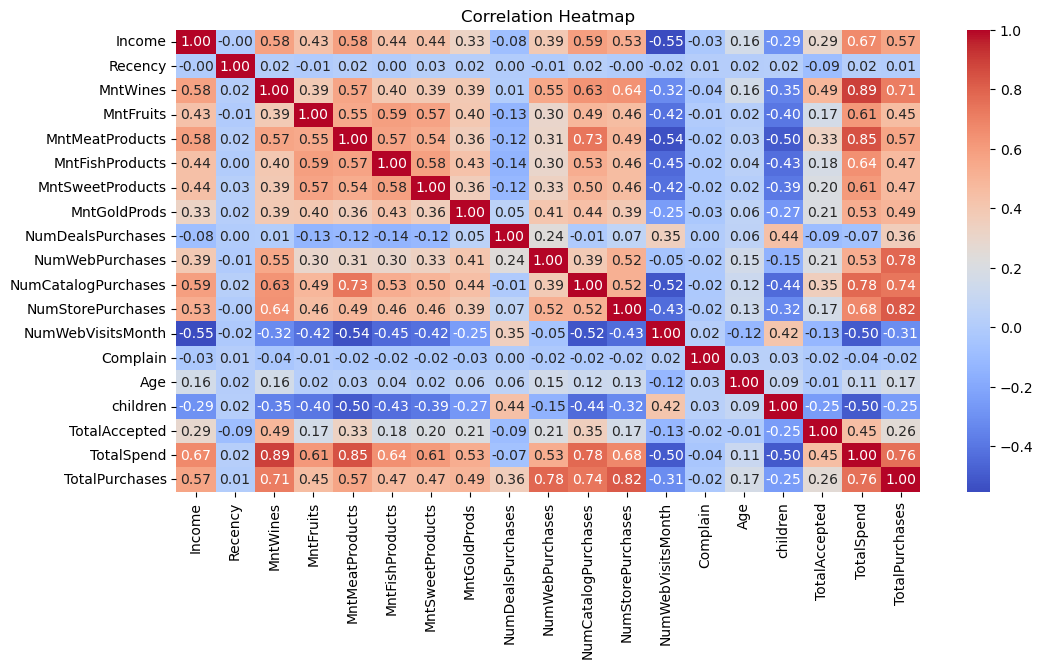

In [65]:
plt.figure(figsize=(12,6))
sns.heatmap(correlation, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

In [67]:
df['Education'].value_counts()

Education
Graduation    1116
PhD            481
Master         365
2n Cycle       200
Basic           54
Name: count, dtype: int64

Axes(0.125,0.11;0.775x0.77)


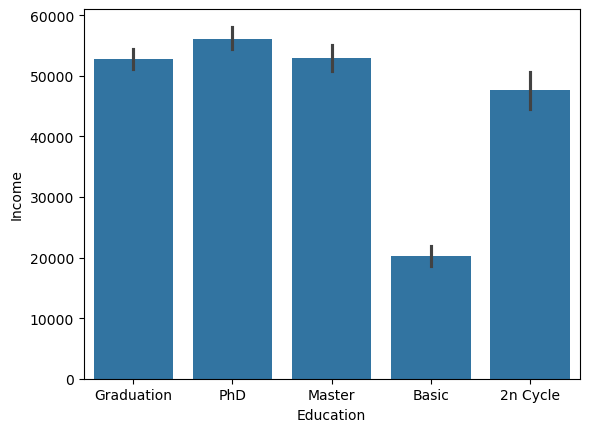

In [69]:
print(sns.barplot(x='Education', y='Income', data=df))

Axes(0.125,0.11;0.775x0.77)


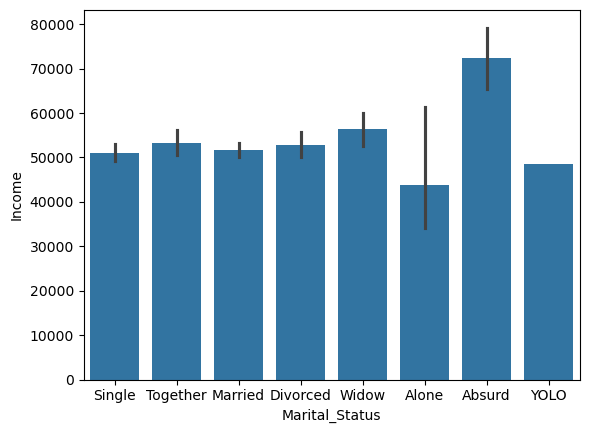

In [71]:
print(sns.barplot(x='Marital_Status', y='Income', data=df))

In [73]:
df["Dt_Customer"].min()

Timestamp('2012-07-30 00:00:00')

In [75]:
df["Dt_Customer"].max()

Timestamp('2014-06-29 00:00:00')

Text(0, 0.5, 'TotalSpend')

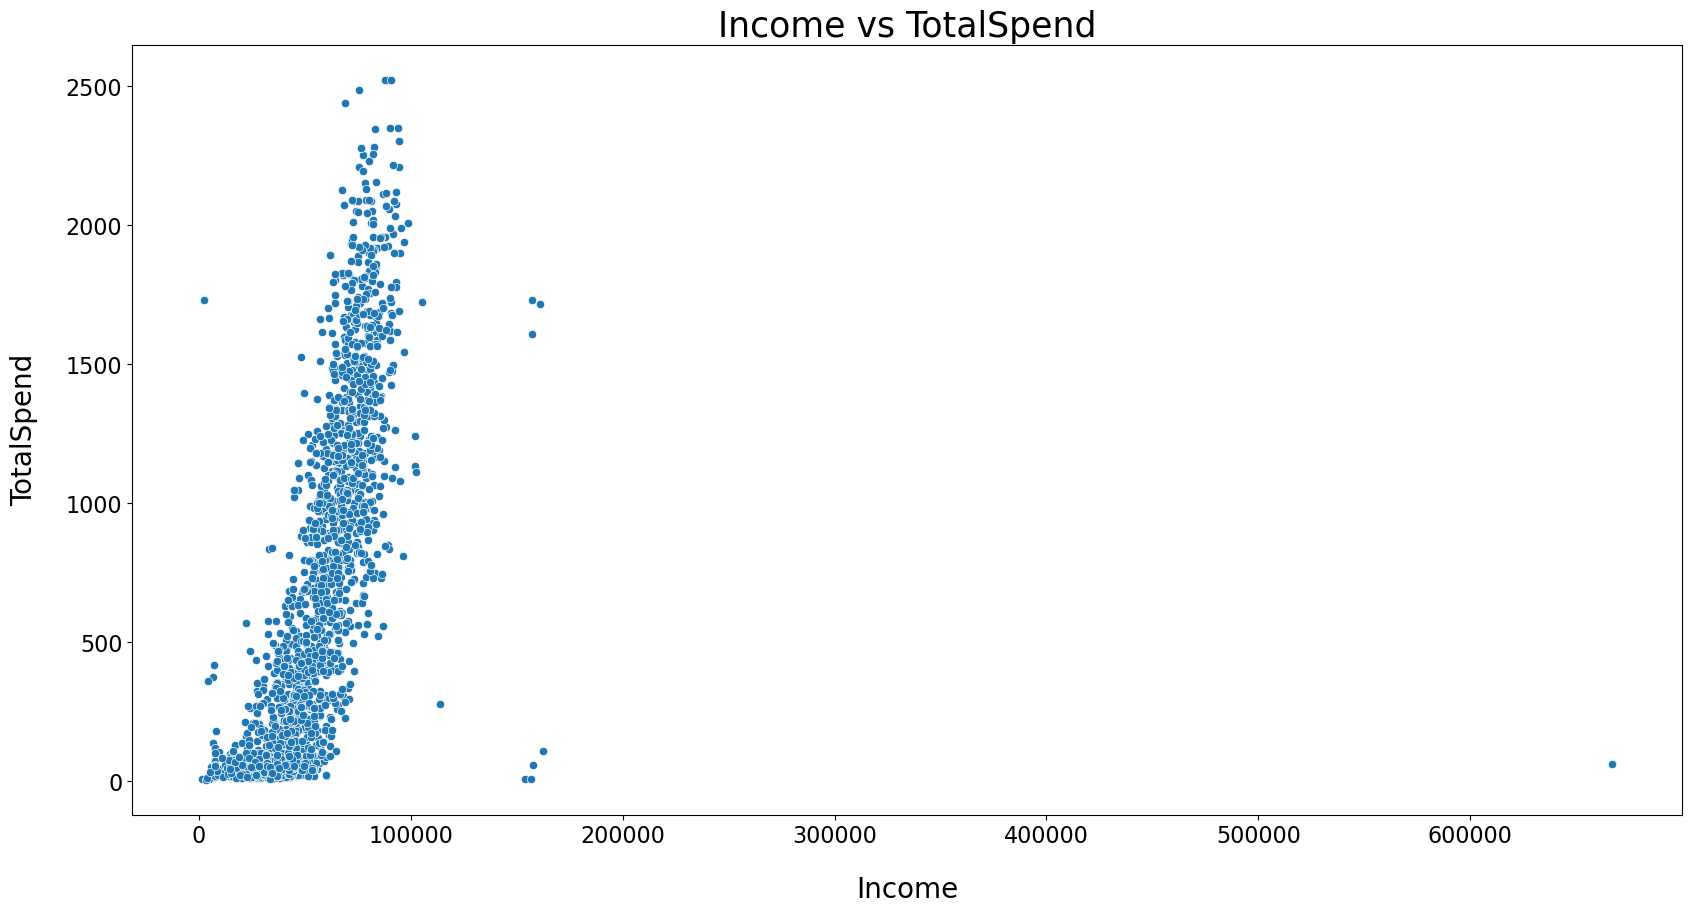

In [77]:
plt.figure(figsize=(20, 10))                                    # Setting the plot size

sns.scatterplot(x = 'Income', y = 'TotalSpend', data = df)                                        # Hint: Use sns.scatterplot()  

plt.xticks(fontsize=16)                                         # Font size of X-label

plt.yticks(fontsize=16)                                         # Font size of Y-label
plt.title("Income vs TotalSpend",fontsize=25)
plt.xlabel("Income", fontsize=20, labelpad=20)                  # Title of X-axis

plt.ylabel("TotalSpend", fontsize=20, labelpad=20)  

Axes(0.125,0.11;0.775x0.77)


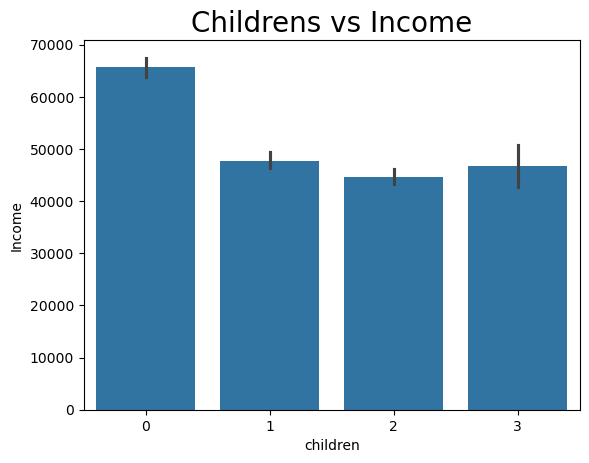

In [79]:
plt.title("Childrens vs Income",fontsize=20)
print(sns.barplot(x='children', y='Income', data=df))
plt.show()

In [85]:
df.to_csv(r"C:\Users\adity\customer_segmentation_project\data\processed\cleaned_data.csv", index=False)

In [87]:
group1=df.groupby("Education")["TotalSpend"].mean().sort_values(ascending=False)
group1

Education
PhD           676.733888
Graduation    621.686380
Master        609.767123
2n Cycle      494.930000
Basic          81.796296
Name: TotalSpend, dtype: float64

In [91]:
df.columns

Index(['Education', 'Marital_Status', 'Income', 'Dt_Customer', 'Recency',
       'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts',
       'MntSweetProducts', 'MntGoldProds', 'NumDealsPurchases',
       'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases',
       'NumWebVisitsMonth', 'Complain', 'Age', 'children', 'TotalAccepted',
       'TotalSpend', 'TotalPurchases'],
      dtype='object')

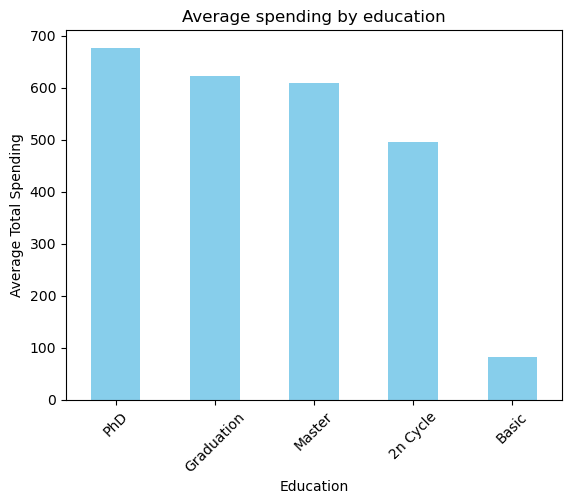

In [89]:
group1.plot(kind="bar", color="skyblue")
plt.title("Average spending by education")
plt.ylabel("Average Total Spending")
plt.xticks(rotation=45)
plt.show()

In [93]:
group2=df.groupby('Marital_Status')['TotalAccepted'].mean().sort_values(ascending=False)
group2

Marital_Status
Absurd      1.500000
Alone       0.666667
Widow       0.592105
Single      0.513800
Divorced    0.500000
YOLO        0.500000
Married     0.417736
Together    0.396161
Name: TotalAccepted, dtype: float64

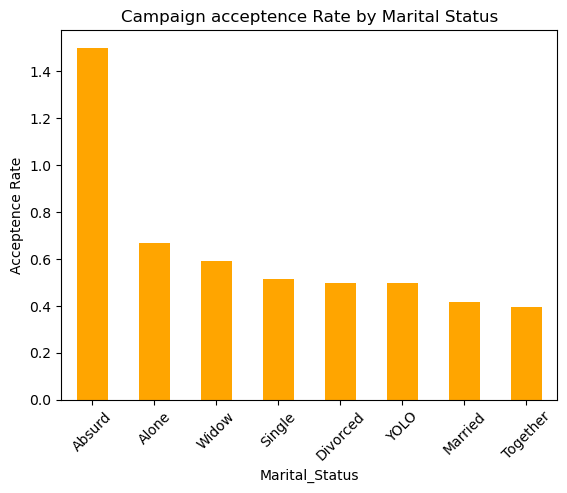

In [97]:
group2.plot(kind="bar", color="Orange")
plt.title("Campaign acceptence Rate by Marital Status")
plt.ylabel("Acceptence Rate")
plt.xticks(rotation=45)
plt.show()

In [99]:
bins = [18,30,40,50,60,70,90]

In [101]:
labels = ["18-29","30-39","40-49","50-59","60-69","70+"]

In [103]:
df["AgeGroup"]= pd.cut(df["Age"],bins=bins , labels=labels)

In [105]:
df

,Education,Marital_Status,Income,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Complain,Age,children,TotalAccepted,TotalSpend,TotalPurchases,AgeGroup
0,Graduation,Single,58138.0,2012-09-04,58,635,88,546,172,88,...,10,4,7,0,68,0,1,1617,25,60-69
1,Graduation,Single,46344.0,2014-03-08,38,11,1,6,2,1,...,1,2,5,0,71,2,0,27,6,70+
2,Graduation,Together,71613.0,2013-08-21,26,426,49,127,111,21,...,2,10,4,0,60,0,0,776,21,50-59
3,Graduation,Together,26646.0,2014-02-10,26,11,4,20,10,3,...,0,4,6,0,41,1,0,53,8,40-49
4,PhD,Married,58293.0,2014-01-19,94,173,43,118,46,27,...,3,6,5,0,44,1,0,422,19,40-49
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,Graduation,Married,61223.0,2013-06-13,46,709,43,182,42,118,...,3,4,5,0,58,1,0,1341,18,50-59
2236,PhD,Together,64014.0,2014-06-10,56,406,0,30,0,0,...,2,5,7,0,79,3,1,444,22,70+
2237,Graduation,Divorced,56981.0,2014-01-25,91,908,48,217,32,12,...,3,13,6,0,44,0,1,1241,19,40-49
2238,Master,Together,69245.0,2014-01-24,8,428,30,214,80,30,...,5,10,3,0,69,1,0,843,23,60-69


In [107]:
group3 = df.groupby("AgeGroup")["Income"].mean()

In [109]:
group3

AgeGroup
18-29    46658.000000
30-39    46283.028302
40-49    49224.877034
50-59    50812.913303
60-69    56200.827887
70+      58944.316294
Name: Income, dtype: float64

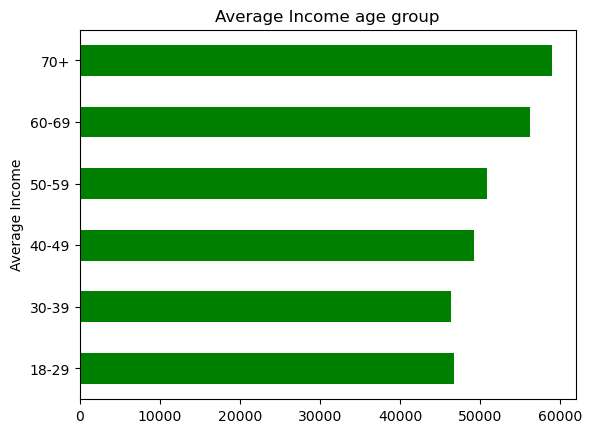

In [115]:
group3.plot(kind="barh", color="Green")
plt.title("Average Income age group")
plt.ylabel("Average Income")
plt.show()